In [ ]:
# 1: Install Required Packages
# Package Imports and Setup
# This cell installs the required packages using pip.
"""
This cell installs all the necessary libraries for the project:
- TensorFlow and Keras for deep learning,
- scikit-learn for evaluation metrics,
- seaborn and matplotlib for plotting,
- gradio for creating a web interface.
"""

!pip install tensorflow keras scikit-learn seaborn matplotlib gradio

In [ ]:
# 2: Enable GPU Memory Growth
# GPU setup for TensorFlow
# This cell checks for a GPU and enables memory growth to avoid allocation errors.
"""
This cell configures TensorFlow to use the GPU more efficiently by enabling dynamic memory growth.
This prevents TensorFlow from allocating all available GPU memory at once.
"""

import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [ ]:
# 3: Download & Extract the Fruit-Images-Dataset
# Downloading dataset from GitHub
# This cell clones the Fruit-Images-Dataset repository from GitHub.
"""
This cell downloads the Fruit-Images-Dataset from GitHub.
The dataset includes images of various fruits and will be used for training and testing the model.
"""

!git clone https://github.com/Horea94/Fruit-Images-Dataset.git


fatal: destination path 'Fruit-Images-Dataset' already exists and is not an empty directory.


In [ ]:
# 4: Reorganize the Dataset into a Binary Structure
# Dataset preparation and directory reorganization
# This cell creates a new directory structure to separate strawberry images from non-strawberry ones.
"""
This cell reorganizes the dataset into two folders for binary classification:
- 'strawberry': Contains images of strawberries.
- 'non-strawberry': Contains images of all other fruits.
Steps include:
1. Defining the original dataset directory.
2. Creating new directories for 'strawberry' and 'non-strawberry'.
3. Copying images into the appropriate folder based on the fruit type.
"""

import os, glob, shutil

original_dataset_dir = "./Fruit-Images-Dataset/Training"
binary_dataset_dir = "./fruit_binary"
strawberry_dir = os.path.join(binary_dataset_dir, "strawberry")
non_strawberry_dir = os.path.join(binary_dataset_dir, "non-strawberry")

os.makedirs(strawberry_dir, exist_ok=True)
os.makedirs(non_strawberry_dir, exist_ok=True)

# List available fruit classes in the dataset
fruit_classes = [d for d in os.listdir(original_dataset_dir) if os.path.isdir(os.path.join(original_dataset_dir, d))]
print("Found fruit classes:", fruit_classes)

# Copy images into the respective binary directories
for fruit in fruit_classes:
    fruit_path = os.path.join(original_dataset_dir, fruit)
    image_files = glob.glob(os.path.join(fruit_path, "*.jpg"))
    if fruit.lower() == "strawberry":
        target_folder = strawberry_dir
    else:
        target_folder = non_strawberry_dir
    for img_file in image_files:
        shutil.copy(img_file, target_folder)

print("Binary dataset created at:", binary_dataset_dir)

Found fruit classes: ['Apple Crimson Snow', 'Nut Pecan', 'Tangelo', 'Apple Pink Lady', 'Apple Red Yellow 1', 'Cherry Rainier', 'Apple Red 1', 'Nectarine Flat', 'Strawberry', 'Pomelo Sweetie', 'Blueberry', 'Potato Sweet', 'Mangostan', 'Kaki', 'Physalis', 'Potato Red Washed', 'Raspberry', 'Pineapple Mini', 'Pepper Green', 'Lychee', 'Huckleberry', 'Kumquats', 'Plum', 'Apple Red Delicious', 'Grape White 3', 'Walnut', 'Grape White', 'Pear Forelle', 'Kiwi', 'Peach', 'Nut Forest', 'Grape Blue', 'Tomato Maroon', 'Pear Monster', 'Pear', 'Apple Red 3', 'Kohlrabi', 'Maracuja', 'Cauliflower', 'Melon Piel de Sapo', 'Onion White', 'Limes', 'Potato Red', 'Pepper Yellow', 'Banana Lady Finger', 'Corn', 'Cantaloupe 2', 'Eggplant', 'Peach 2', 'Plum 2', 'Dates', 'Lemon Meyer', 'Pitahaya Red', 'Plum 3', 'Cantaloupe 1', 'Grapefruit Pink', 'Banana Red', 'Apple Golden 1', 'Salak', 'Pear Abate', 'Tomato 1', 'Physalis with Husk', 'Clementine', 'Fig', 'Apple Red 2', 'Tomato 3', 'Apple Braeburn', 'Mulberry', 'Pea

In [ ]:
# 5: Load the Dataset from the Binary Directory
# Loading dataset using tf.keras.preprocessing.image_dataset_from_directory
# This cell loads the binary dataset into a TensorFlow dataset.
"""
This cell loads the reorganized dataset into a TensorFlow dataset using
tf.keras.preprocessing.image_dataset_from_directory. The images are resized
to 224x224 pixels and loaded in batches of 32.
"""

IMAGE_SIZE = 224    # Target image size
BATCH_SIZE = 32     # Batch size

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    binary_dataset_dir,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Display the class names from the dataset
class_names = dataset.class_names
print("Dataset classes:", class_names)

Found 2209 files belonging to 2 classes.
Dataset classes: ['non-strawberry', 'strawberry']


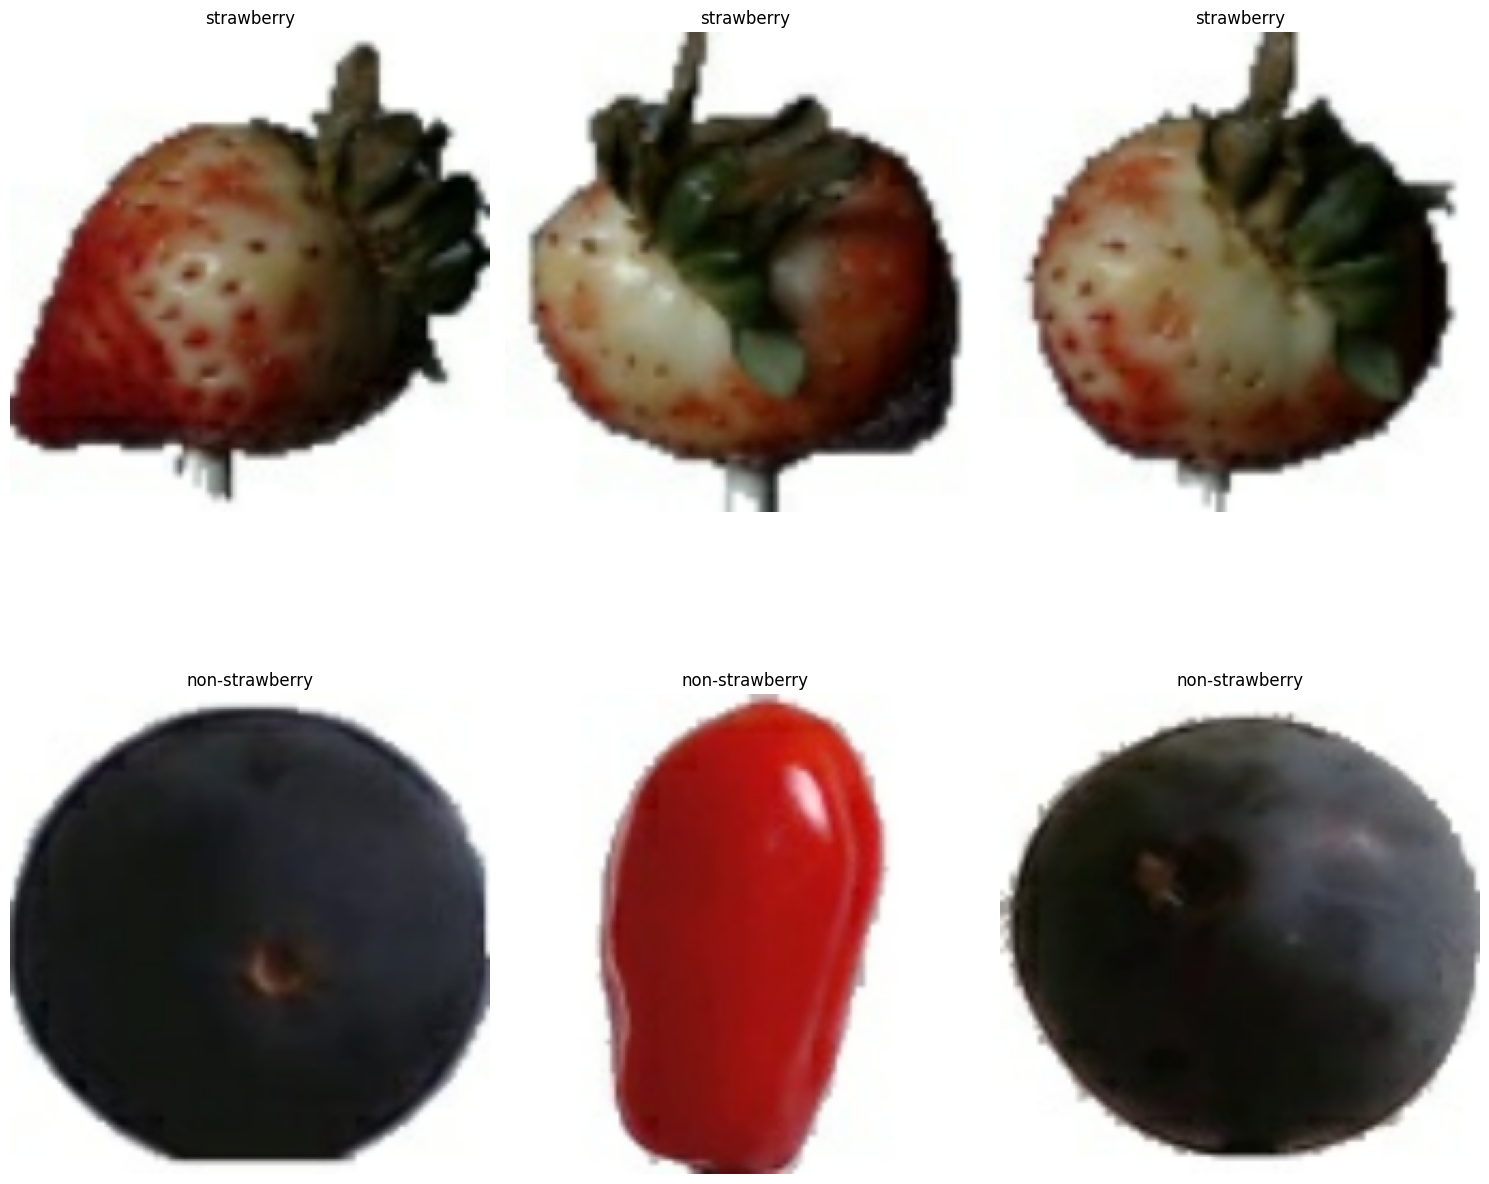

In [ ]:
# 6: Plot Sample Images from Each Class
# Plotting sample images per class
# This cell extracts and plots 3 sample images from each class for visual inspection.
"""
This cell selects and plots 3 sample images from each class (strawberry and non-strawberry)
using matplotlib. This visualization confirms that the images are loaded and labeled correctly.
"""

import matplotlib.pyplot as plt
import numpy as np

class_names_of_interest = ['strawberry', 'non-strawberry']
class_indices = [class_names.index(name) for name in class_names_of_interest]
sample_images = {name: [] for name in class_names_of_interest}

# Collect 3 sample images per class
for images, labels in dataset:
    for i in range(len(labels)):
        label = labels[i].numpy()
        if label in class_indices and len(sample_images[class_names[label]]) < 3:
            sample_images[class_names[label]].append((images[i], labels[i]))
        if all(len(sample_images[name]) == 3 for name in class_names_of_interest):
            break
    if all(len(sample_images[name]) == 3 for name in class_names_of_interest):
        break

plt.figure(figsize=(15, 15))
for i, name in enumerate(class_names_of_interest):
    for j, (image, label) in enumerate(sample_images[name]):
        ax = plt.subplot(len(class_names_of_interest), 3, i * 3 + j + 1)
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(name)
        plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# 7: Data Augmentation & Splitting (80-10-10)
# Data augmentation and dataset partitioning
# This cell defines augmentation layers and a function to split the dataset.
# Augmentation layers are defined similarly to the original code functions.
"""
This cell defines data augmentation layers (such as cropping, rotation, etc.) and
a function to split the dataset into training, validation, and test sets (80-10-10 split).
The training set can be augmented to improve model generalization.
"""

crop_layer = tf.keras.layers.RandomCrop(IMAGE_SIZE, IMAGE_SIZE)
rotate_layer = tf.keras.layers.RandomRotation(0.4)
contrast_layer = tf.keras.layers.RandomContrast(0.2)
flip_layer = tf.keras.layers.RandomFlip("horizontal_and_vertical")
brightness_layer = tf.keras.layers.RandomBrightness([0.1, 0.4])

def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.20, test_split=0.10,
                              shuffle=True, shuffle_size=10000, augment_data=True):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    if augment_data:
        # Apply augmentation only to training dataset using a RandomCrop layer (as an example)
        train_ds = train_ds.map(lambda x, y: (crop_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
train_ds = train_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# 8: Build the ResNet50-based Model with Preprocessing Layer
# Model building using ResNet50 and adding custom dense layers
# This cell creates the model by first adding a Lambda preprocessing layer,
# then the ResNet50 base model (with frozen weights), and custom classification layers.
"""
This cell builds the deep learning model. It starts by preprocessing the input images
to match ResNet50 requirements. Then it loads the pre-trained ResNet50 model (without its top layers)
and freezes its weights. Additional dense layers, dropout, and batch normalization layers are added
to tailor the model for binary classification.
"""

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam

resnet_model = tf.keras.Sequential(name="ResNet50_Based_Model")
# Preprocessing layer: converts input images to the format required by ResNet50
resnet_model.add(tf.keras.layers.Lambda(preprocess_input, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))

# Load ResNet50 base model with pretrained ImageNet weights; exclude the top layers and use global average pooling.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), pooling='avg')
for layer in base_model.layers:
    layer.trainable = False  # Freeze the base model layers

resnet_model.add(base_model)
resnet_model.add(layers.Flatten())

# Add custom dense layers with regularization and dropout
resnet_model.add(layers.Dense(64, activation='relu', kernel_regularizer=L2(0.005)))
resnet_model.add(layers.BatchNormalization())
resnet_model.add(layers.Dropout(0.5))
resnet_model.add(layers.Dense(32, activation='relu'))
resnet_model.add(layers.BatchNormalization())
resnet_model.add(layers.Dropout(0.1))
resnet_model.add(layers.Dense(2, activation='softmax'))  # Final prediction layer for 2 classes

# Display model summary for verification
resnet_model.summary()

# Compile the model with an Adam optimizer and sparse categorical crossentropy loss.
resnet_model.compile(optimizer=Adam(learning_rate=0.001, decay=0.01),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "ResNet50_Based_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,721,378 (90.49 MB)

 Trainable params: 133,474 (521.38 KB)

 Non-trainable params: 23,587,904 (89.98 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
# 9: Train the Model
# Training the model with Model.fit
# This cell trains the model and prints training history metrics.
"""
This cell trains the model using the training dataset and monitors its performance on the validation set.
After training, key metrics such as accuracy and loss are printed for both training and validation.
"""

history = resnet_model.fit(
    train_ds,
    epochs=30,  # Adjust epochs as needed
    validation_data=val_ds
)

print("Highest Accuracy: ", max(history.history['accuracy']))
print("Highest Validation Accuracy: ", max(history.history['val_accuracy']))
print("Lowest Loss: ", min(history.history['loss']))
print("Lowest Validation Loss: ", min(history.history['val_loss']))
print("Final Accuracy: ", history.history['accuracy'][-1])
print("Final Validation Accuracy: ", history.history['val_accuracy'][-1])
print("Final Loss: ", history.history['loss'][-1])
print("Final Validation Loss: ", history.history['val_loss'][-1])

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 219ms/step - accuracy: 0.8576 - loss: 0.8839 - val_accuracy: 1.0000 - val_loss: 0.3992
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.9978 - loss: 0.4013 - val_accuracy: 1.0000 - val_loss: 0.2726
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.9995 - loss: 0.2677 - val_accuracy: 1.0000 - val_loss: 0.1944
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.9989 - loss: 0.1889 - val_accuracy: 1.0000 - val_loss: 0.1438
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 1.0000 - loss: 0.1388 - val_accuracy: 1.0000 - val_loss: 0.1076
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 1.0000 - loss: 0.1040 - val_accuracy: 1.0000 - val_loss: 0.0844
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 1.0000 - loss: 0.0845 - val_accuracy: 1.0000 - val_loss: 0.0651
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 1.0000 - loss: 0.0629 - val_accuracy:

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00        52

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



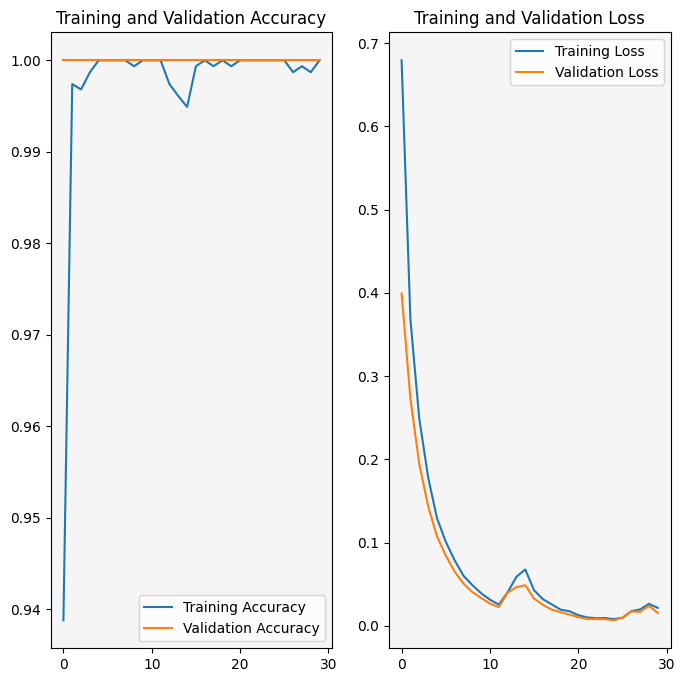

In [ ]:
# 10: Model Evaluation and Training History Plot
# Evaluation, metrics, and plotting training history
# This cell evaluates the model on the test set, computes additional metrics, and plots the training history.
"""
This cell evaluates the trained model on the test dataset.
It calculates evaluation metrics including F1 score, precision, recall, and accuracy,
and then prints a detailed classification report.
Additionally, it plots the training history to visualize how accuracy and loss evolved over epochs.
"""

import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

# Prepare test data for evaluation
test_images = []
test_labels = []
for img, label in test_ds.unbatch():
    test_images.append(img.numpy())
    test_labels.append(label.numpy())
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Predict on test set
y_pred = resnet_model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_labels

# Calculate evaluation metrics
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
accuracy_val = accuracy_score(y_true, y_pred)
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy_val}')
print(classification_report(y_true, y_pred))

# Plot training and validation accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
completed_epochs = len(history.history['accuracy'])

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(completed_epochs), acc, label='Training Accuracy')
plt.plot(range(completed_epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(False)
plt.gca().set_facecolor('#F5F5F5')

plt.subplot(1, 2, 2)
plt.plot(range(completed_epochs), loss, label='Training Loss')
plt.plot(range(completed_epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(False)
plt.gca().set_facecolor('#F5F5F5')
plt.show()

In [ ]:
# 11: Fine-Tuning the Model
# Fine tuning by unfreezing the last 30 layers
# This cell unfreezes the last 30 layers of the base model and continues training.
"""
This cell fine-tunes the model by unfreezing the last 30 layers of the pre-trained ResNet50 base.
After unfreezing, the model is recompiled with a suitable learning rate and trained for additional epochs.
This step helps the model better adapt to the specific dataset.
"""

base_model = resnet_model.layers[1]  # Extract the base ResNet50 model
for layer in base_model.layers[:-30]:
    layer.trainable = False
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine tuning.
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
resnet_model.summary()

history_finetune = resnet_model.fit(
    train_ds,
    epochs=10,  # Additional epochs for fine-tuning
    batch_size=64,
    validation_data=val_ds,
)

print("Highest Accuracy (Fine Tuned): ", max(history_finetune.history['accuracy']))
print("Highest Validation Accuracy (Fine Tuned): ", max(history_finetune.history['val_accuracy']))
print("Lowest Loss (Fine Tuned): ", min(history_finetune.history['loss']))
print("Lowest Validation Loss (Fine Tuned): ", min(history_finetune.history['val_loss']))
print("Final Accuracy (Fine Tuned): ", history_finetune.history['accuracy'][-1])
print("Final Validation Accuracy (Fine Tuned): ", history_finetune.history['val_accuracy'][-1])
print("Final Loss (Fine Tuned): ", history_finetune.history['loss'][-1])
print("Final Validation Loss (Fine Tuned): ", history_finetune.history['val_loss'][-1])

Model: "ResNet50_Based_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,721,378 (90.49 MB)

 Trainable params: 14,583,650 (55.63 MB)

 Non-trainable params: 9,137,728 (34.86 MB)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 239ms/step - accuracy: 0.9973 - loss: 0.0306 - val_accuracy: 0.2232 - val_loss: 47.9632
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 299ms/step - accuracy: 0.9927 - loss: 0.0387 - val_accuracy: 0.6250 - val_loss: 15.6159
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 1.0000 - loss: 0.0243 - val_accuracy: 1.0000 - val_loss: 0.0153
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.9998 - loss: 0.0146 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 0.9953 - loss: 0.0289 - val_accuracy: 1.0000 - val_loss: 0.0187
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - accuracy: 0.9979 - loss: 0.0305 - val_accuracy: 1.0000 - val_loss: 0.0297
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 1.0000 - loss: 0.0281 - val_accuracy: 1.0000 - val_loss: 0.0188
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 1.0000 - loss: 0.0177 - val_accura

In [ ]:
# 12: Define a Prediction Function and Launch Gradio Interface
# Prediction function and Gradio interface for testing
# This cell defines a prediction function and creates a Gradio interface for uploading images.
"""
This cell defines a function to perform predictions on new images.
It converts the image into the required format and outputs the predicted class with a confidence score.
Additionally, a Gradio interface is launched to allow interactive testing of the model through a simple web UI.
"""

import gradio as gr
import cv2

def predict(model, img):
    """
    Receives an image, preprocesses it, and returns the predicted class and confidence.
    """
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    preds = model.predict(img_array)
    predicted_class = class_names[np.argmax(preds[0])]
    confidence = round(100 * np.max(preds[0]), 2)
    return predicted_class, confidence

def gradio_interface(image_input):
    """
    Gradio interface function to process the uploaded image and return prediction results.
    """
    # Resize input image if not already the target size
    image_resized = cv2.resize(image_input, (IMAGE_SIZE, IMAGE_SIZE))
    predicted_class, confidence = predict(resnet_model, image_resized)
    return f"Prediction: {predicted_class}\nConfidence: {confidence}%"

iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Image(type="numpy"),
    outputs="text",
    title="Strawberry Classifier",
    description="Upload an image to check if it's a strawberry (or not) with prediction confidence."
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a46b120bd84b79ac73.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
